# **ANN**

(1) Design and implement a neural network model to perform binary image classification. The objective is to classify images into two distinct categories — cats and dogs — using a feed-forward neural network approach. Dataset(https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset). (You may need manual feature extraction)

• What were the limitations of FFNNs with high-dimensional image inputs?

(2) Design and implement a back propagation neural network model to perform binary image classification. The objective is to classify images into two distinct categories — cats and dogs.

In [4]:
#Install dependencies
!pip install opencv-python scikit-learn tensorflow torch

^C


In [1]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
#from google.colab import drive

In [3]:
# Mount Google Drive and set paths
#drive.mount('/content/drive')  # Upload your dataset to Drive
#dataset_path = '/content/drive/MyDrive/dog_and_cat_classification_dataset'  # Adjust this if needed

dataset_path = 'dataset/dog_and_cat_classification_dataset'

# Print the dataset path to verify it
print(f"Dataset path: {dataset_path}")

# Check if the dataset directory exists
if os.path.exists(dataset_path):
    print("Dataset directory found!")
else:
    print(f"Error: Dataset directory not found at {dataset_path}")

Dataset path: dataset/dog_and_cat_classification_dataset
Dataset directory found!


In [4]:
cat_folder = os.path.join(dataset_path, 'Cat')
dog_folder = os.path.join(dataset_path, 'Dog')
if os.path.exists(cat_folder) and os.path.exists(dog_folder):
    print("Cat and Dog subfolders found!")
else:
    print("Error: Cat or Dog subfolders not found. Please check the dataset path and folder structure.")

Cat and Dog subfolders found!


# **TASK 1:**

In [6]:
# Feature extraction function
IMG_SIZE = 128
def extract_features(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
    return hist / np.sum(hist)

In [7]:
# Load images and extract features
X, y = [], []

for folder, label in [(cat_folder, 'cat'), (dog_folder, 'dog')]:
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        image = cv2.imread(img_path)
        if image is not None:
            features = extract_features(image)
            X.append(features)
            y.append(label)

X = np.array(X)
y = np.array(y)

In [8]:
# Encode labels and preprocess features
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build the Feedforward Neural Network
model = Sequential([
    Dense(256, input_shape=(256,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Imak47\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.3945 - loss: 0.8670 - val_accuracy: 0.1667 - val_loss: 0.9930
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7815 - loss: 0.4786 - val_accuracy: 0.2500 - val_loss: 1.3621
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8590 - loss: 0.3772 - val_accuracy: 0.1667 - val_loss: 1.5076
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9082 - loss: 0.2890 - val_accuracy: 0.1667 - val_loss: 1.5466
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9508 - loss: 0.2389 - val_accuracy: 0.2500 - val_loss: 1.5522
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9612 - loss: 0.2099 - val_accuracy: 0.3333 - val_loss: 1.5935
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9858 - loss: 0.1648 - val_accuracy: 0.4167 - val_loss: 1.6941
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9754 - loss: 0.1571 - val_accuracy: 0.4167 - val_loss: 1.8328

In [11]:
# Evaluate and print results
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=le.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4167 - loss: 3.1155
Test Accuracy: 0.42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
              precision    recall  f1-score   support

         cat       0.33      0.17      0.22         6
         dog       0.44      0.67      0.53         6

    accuracy                           0.42        12
   macro avg       0.39      0.42      0.38        12
weighted avg       0.39      0.42      0.38        12



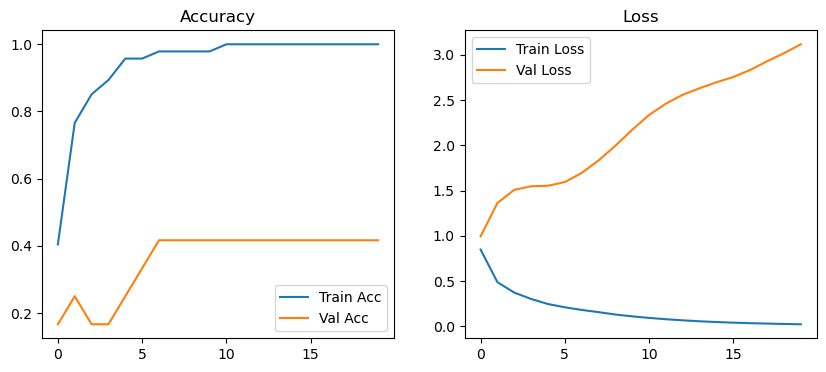

In [12]:
# STEP 10: Plot accuracy and loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

**• What were the limitations of FFNNs with high-dimensional image inputs?**

Limitations of FFNNs with High-Dimensional Images:

1. High computational cost – Too many parameters when flattening large images.

2. No spatial awareness – FFNNs treat pixels independently, ignoring image structure.

3. Manual feature extraction – Can't learn patterns automatically like CNNs.

4. Overfitting – Large networks with limited data often memorize instead of generalize.

5. No translation invariance – Can’t recognize objects in different positions.




---



# **TASK 2:**

In [16]:
# Preprocessing & Manual Feature Extraction
def extract_features(image):
    image = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()
    return hist / np.sum(hist)  # Normalize

In [17]:
# Backpropagation Network (Using Keras)
model = Sequential([
    Dense(256, input_dim=256, activation='relu'),  # Input layer
    Dense(128, activation='relu'),                 # Hidden layer
    Dense(1, activation='sigmoid')                 # Output layer (binary)
])

C:\Users\Imak47\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model (backprop happens here)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train (Backpropagation used automatically under the hood)
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.4825 - loss: 0.7734 - val_accuracy: 0.2500 - val_loss: 0.9588
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8344 - loss: 0.4637 - val_accuracy: 0.2500 - val_loss: 1.2245
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8732 - loss: 0.3643 - val_accuracy: 0.1667 - val_loss: 1.3312
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8978 - loss: 0.2852 - val_accuracy: 0.1667 - val_loss: 1.3632
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9120 - loss: 0.2457 - val_accuracy: 0.1667 - val_loss: 1.3695
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9508 - loss: 0.2090 - val_accuracy: 0.1667 - val_loss: 1.4188
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9754 - loss: 0.1848 - val_accuracy: 0.2500 - val_loss: 1.5101
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9858 - loss: 0.1459 - val_accuracy: 0.3333 - val_loss: 1.6337

In [20]:
# Evaluation
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 2.8519
Accuracy: 0.5


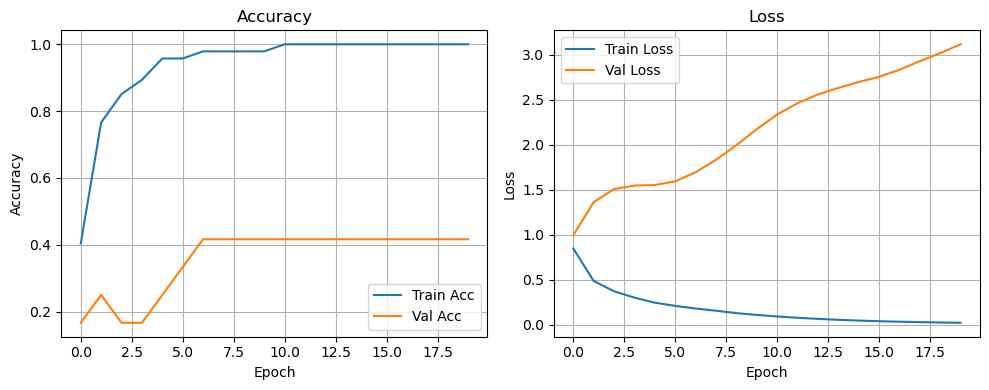

In [21]:
plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



---

